<font style="font-size:28px;" align="left"><b> Qiskit installation and test </b></font>

- [Check your system](#check)
- [Install qiskit](#install)
- [Tips](#tips)
- [Execute an example quantum program](#test)
- [Complete test](#complete)

<hr id="check">

### Check your system

Check your system, if Qiskit has already been installed:

In [1]:
import qiskit
versions = qiskit.__version__
print("The version of Qiskit is",versions)

The version of Qiskit is 2.1.1


**You should be able to see the version number of any library that is already installed in your system.**

<hr id="install">

### Install qiskit

(If you are an experienced user, visit this link: https://docs.quantum-computing.ibm.com/start/install)

You can install Qiskit by executing the following cell:

In [2]:
!pip install "qiskit[visualization]">=1.0 --user

zsh:1: 1.0 not found


In [3]:
!pip install qiskit-aer --user

__*Restart the kernel*__ (check "Kernel" menu) to apply the changes to the current notebook.

<hr id="tips">

### Tips

_Any terminal/shell command can be executed in the notebook cells by putting an exclamation mark (!) at the beginning of the command._

_$\rightarrow$ To update Qiskit to the latest version, execute the following command in a code cell_

    !pip install -U qiskit --user
    
_$\rightarrow$ To uninstall Qiskit, execute the following command in a code cell_

    !pip uninstall qiskit

In [4]:
#!pip install -U qiskit --user
#!pip uninstall qiskit

<hr id="test">

### Execute an example quantum program


1) Create a quantum circuit

In [5]:
# import the objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from random import randrange

# create a quantum circuit and its register objects
qreg = QuantumRegister(2) # quantum register with two quantum bits
creg = ClassicalRegister(2) # classical register with two classical bit
circuit = QuantumCircuit(qreg,creg) # quantum circuit composed by a quantum register and a classical register

# apply a Hadamard gate to the first qubit
circuit.h(qreg[0])

# set the second qubit to state |1>
circuit.x(qreg[1])

# apply CNOT(first_qubit,second_qubit)
circuit.cx(qreg[0],qreg[1])

# measure the both qubits
circuit.measure(qreg,creg)

print("The execution of the cell was completed, and the circuit was created :)")

The execution of the cell was completed, and the circuit was created :)


2) Draw the circuit

_Run the cell once more if the figure is not shown_

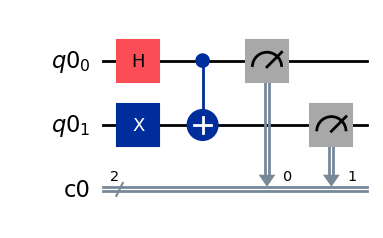

In [6]:
# draw circuit 
circuit.draw(output='mpl')

# the output will be a "matplotlib.Figure" object

3) Execute the circuit 1024 times in the local simulator and print the observed the outcomes

In [7]:
## execute the circuit 1024 times
job = AerSimulator().run(circuit,shots=1024)
# get the result
counts = job.result().get_counts(circuit)
print(counts)

{'01': 532, '10': 492}


<hr id="complete">

### Complete test

Here we put all methods and objects of Qiskit used througout this tutorial (see [Qiskit: Quick Reference](Q01_Qiskit_Reference.ipynb) for a complete list).

By running the cell below, you should be able to test whether your Qiskit installation is ready for our tutorial.

_It was tested with Qiskit 1.0.0 on April 12, 2024._

┌───┐┌───────────────┐┌───┐ ░ ┌─┐            
q_0: ────────────┤ X ├┤ U(2π/7,0,0,0) ├┤ X ├─░─┤M├────────────
        ┌───┐    └─┬─┘└───────┬───────┘└─┬─┘ ░ └╥┘┌─┐         
q_1: ───┤ H ├──────■──────────■──────────■───░──╫─┤M├─────────
        ├───┤                            │   ░  ║ └╥┘┌─┐      
q_2: ───┤ X ├────────────────────────────■───░──╫──╫─┤M├──────
     ┌──┴───┴───┐                            ░  ║  ║ └╥┘┌─┐   
q_3: ┤ Ry(2π/7) ├────────────────────────────░──╫──╫──╫─┤M├───
     └──┬───┬───┘                            ░  ║  ║  ║ └╥┘┌─┐
q_4: ───┤ Z ├────────────────────────────────░──╫──╫──╫──╫─┤M├
        └───┘                                ░  ║  ║  ║  ║ └╥┘
c: 5/═══════════════════════════════════════════╩══╩══╩══╩══╩═
                                                3  1  4  0  2

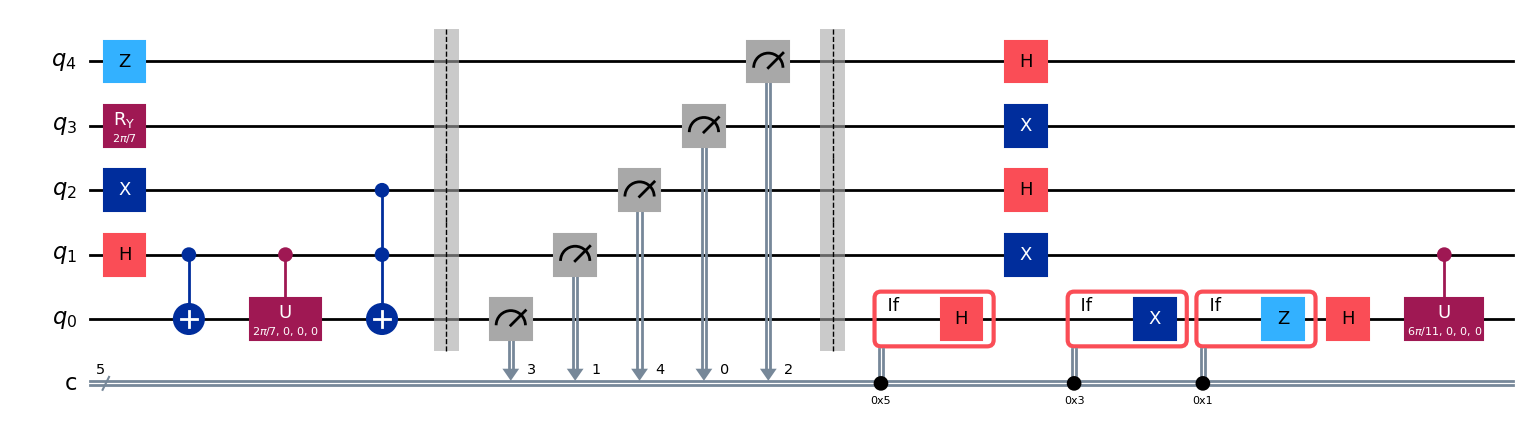

measurement outcomes are: {'11011': 16, '11010': 82, '10001': 85, '10000': 414, '10011': 75, '10010': 328}

unitary matrix is
[[ 0.   +0.j  0.   +0.j  0.532+0.j  0.847-0.j]
 [ 0.847+0.j -0.532+0.j  0.   +0.j  0.   +0.j]
 [ 0.532+0.j  0.847-0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.847+0.j -0.532+0.j]]

quantum state is
0.0+0.0j
0.847+0.0j
0.532+0.0j
0.0+0.0j

All looks fine :-)


In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator, UnitarySimulator, StatevectorSimulator
from math import pi

# A quantum circuit is composed by a quantum and a classical register in Qiskit
q = QuantumRegister(5,"q") # this quantum register has 5 qubits
c = ClassicalRegister(5,"c") # this classical register has 5 classical bits

qc = QuantumCircuit(q,c) # a quantum circuit with quantum and classical registers q and c

qc.x(q[2]) # apply x-gate to the qubit "q[2]" of the quantum circuit "qc"
qc.z(q[4]) # apply z-gate to the qubit "q[4]" of the quantum circuit "qc"
qc.h(q[1]) # apply h-gate to the qubit "q[1]" of the quantum circuit "qc"

a = pi/7
qc.ry(2*a,q[3]) # apply ry-gate with the specified angle to the qubit "q[3]" of the quantum circuit "qc"

qc.cx(q[1],q[0]) # apply cx-gate to the qubits "q[1]" and "q[0]" of the quantum circuit "qc"

qc.cu(2*a,0,0,0,q[1],q[0]) # apply controlled rotation operator with the specified angle 
                          #  to the qubits "q[1]" and "q[0]" of the quantum circuit "qc"

qc.ccx(q[2],q[1],q[0]) # apply ccx-gate to the qubits "q[2]", "q[1]", and "q[0]" of the quantum circuit "qc"

qc.barrier()

qc.measure(q[0],c[3]) # measure q[0] and write the output on c[3]
qc.measure(q[1],c[1]) # measure q[1] and write the output on c[1]
qc.measure(q[2],c[4]) # measure q[2] and write the output on c[4]
qc.measure(q[3],c[0]) # measure q[3] and write the output on c[0]
qc.measure(q[4],c[2]) # measure q[4] and write the output on c[2]

display(qc.draw())

qc.barrier()

# qc.h(q[0]).c_if(c,5)
with qc.if_test((c, 5)):
    qc.h(q[0])
# qc.x(q[0]).c_if(c,3)
with qc.if_test((c, 3)):
    qc.x(q[0])
# qc.z(q[0]).c_if(c,1)
with qc.if_test((c, 1)):
    qc.z(q[0])

for i in range(5):
    if i % 2 ==0: qc.h(q[i])
    else: qc.x(q[i])
        
b = 3*pi/11
qc.cu(2*b,0,0,0,q[1],q[0])

display(qc.draw(output='mpl',reverse_bits=True))

job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)   
print("measurement outcomes are:",counts)
print()

q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")

qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.ry(a,q[0])
qc.x(q[1])
qc.cx(q[0],q[1])

job = UnitarySimulator().run(qc,shots=1,optimization_level=0)
precision = 3
current_unitary=job.result().get_unitary(qc,precision).data

print("unitary matrix is")
print(current_unitary)
print()

job = StatevectorSimulator().run(qc,optimization_level=0)
precision = 3
current_quantum_state=job.result().get_statevector(qc,precision).data
print("quantum state is")
for val in current_quantum_state:
    print(str(val.real)+"+"+str(val.imag)+"j")

print()
print("All looks fine :-)")